##**Importing Libraries and dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

house_data = pd.read_excel("HousePricePrediction.xlsx")

# Prints first 5 records of the dataset
print(house_data.head(5))
# Prints the information about the dataset
print("\nDATASET OVERVIEW:")
print(house_data.info())
# Prints the statistics summary of the dataset
print("\nSTATISTICAL SUMMARY:")
print(house_data.describe())


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  

DATASET OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (tota

In [2]:
# Using the shape method to show the dimensions of the dataset
house_data.shape

(2919, 13)

## **Data Preprocessing**

In [3]:
# Checking the range of SalePrice(Target Variable)
# To understand the spread of the variable in dataset
max_price = house_data['SalePrice'].max()
min_price = house_data['SalePrice'].min()
price_range = max_price - min_price

print(f"Maximum SalePrice: {max_price}")
print(f"Minimum SalePrice: {min_price}")
print(f"Range of SalePrice: {price_range}")


Maximum SalePrice: 755000.0
Minimum SalePrice: 34900.0
Range of SalePrice: 720100.0


In [4]:
# Categorizing the features based on their data type and calculating their number
object_type = (house_data.dtypes == 'object')
object_cols = list(object_type[object_type].index)
print("Categorical features:",len(object_cols))

int_type = (house_data.dtypes == 'int')
int_cols = list(int_type[int_type].index)
print("Integer features:",len(int_cols))

float_type = (house_data.dtypes == 'float')
float_cols = list(float_type[float_type].index)
print("Float features:",len(float_cols))


Categorical features: 4
Integer features: 6
Float features: 3


## **Exploratory Data Analysis**

<Axes: >

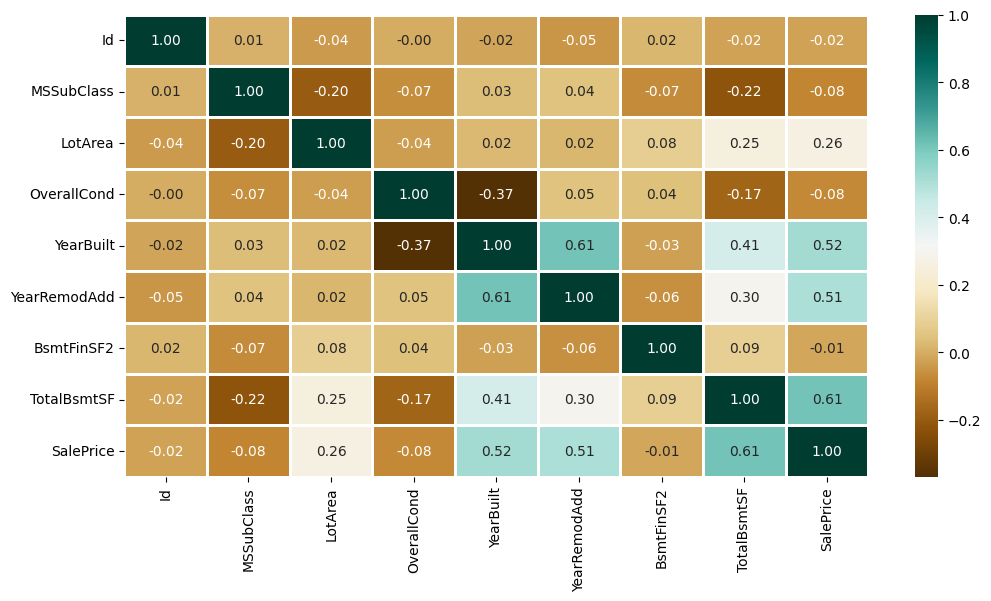

In [5]:
# Selecting numerical features for correlation analysis
numerical_dataset = house_data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)



**1.TotalBsmtSF has a positive correlation of approximately 0.61 with SalePrice, which means houses with larger basement tend to sell for higher prices.**

**2.YearBuilt and YearRemodAdd also have moderate positive correlations around 0.52 and 0.51, respectively, which means new houses and those recently remodelled tend to have higher prices.**

**3.LotArea shows a weak positive correlation of 0.26 with SalePrice, indicating lot size has a less significant impact on the sales price.**

**4.Variables such as OverallCond, BsmtFinSF2, and MSSubClass show weak or no significant correlation with SalePrice.**

<ipython-input-6-229579bc2ff0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(house_data['SalePrice'], shade=True, color='green')


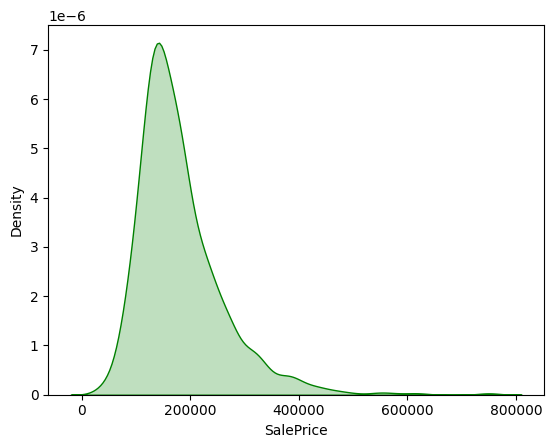

In [6]:
# Distribution of Sales Price
sns.kdeplot(house_data['SalePrice'], shade=True, color='green')
plt.show()

**The distribution of house sale prices is displayed in the graph.It shows that the majority of houses sell for between 100,000 dollars and 300,000 dollars. Fewer houses are being sold for extremely high or extremely low prices.
There is a lengthy tail to the right, indicating that the distribution is right-skewed.This suggests that the average price is higher than the median price since certain houses have exceptionally high sale prices.**

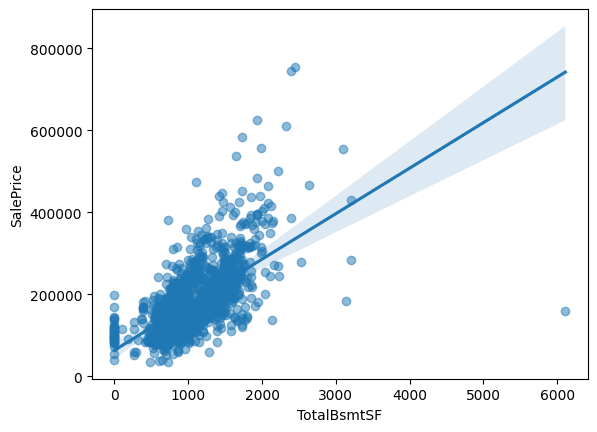

In [7]:
# Plotting relation between TotalBsmtSF ans Sales Price
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=house_data, scatter_kws={'alpha':0.5})
plt.show()

**The sale price typically rises in parallel with the size of the basement. This implies that a larger basement is typically linked to a higher home's value.**

**There is some fluctuation seen from the dispersed data points. This indicates that although basement size plays a role, the sale price is also influenced by other factors.**

**The line that best fits the data points is the blue one. It displays the overall pattern of the two variables' relationship.**

**A small number of data points considerably depart from the overall pattern. These can be houses with special characteristics or situations that raise or lower their value.**

<ipython-input-8-36e11d294d2c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=object_cols,y=unique_values,palette='viridis')


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

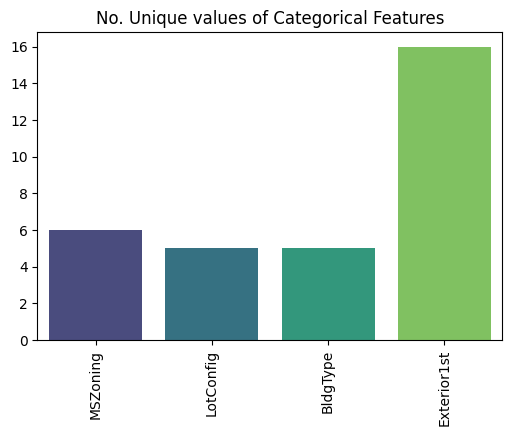

In [8]:
# Visualizing different categorical variables
unique_values = []
for col in object_cols:
  unique_values.append(house_data[col].unique().size)
plt.figure(figsize=(6,4))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values,palette='viridis')


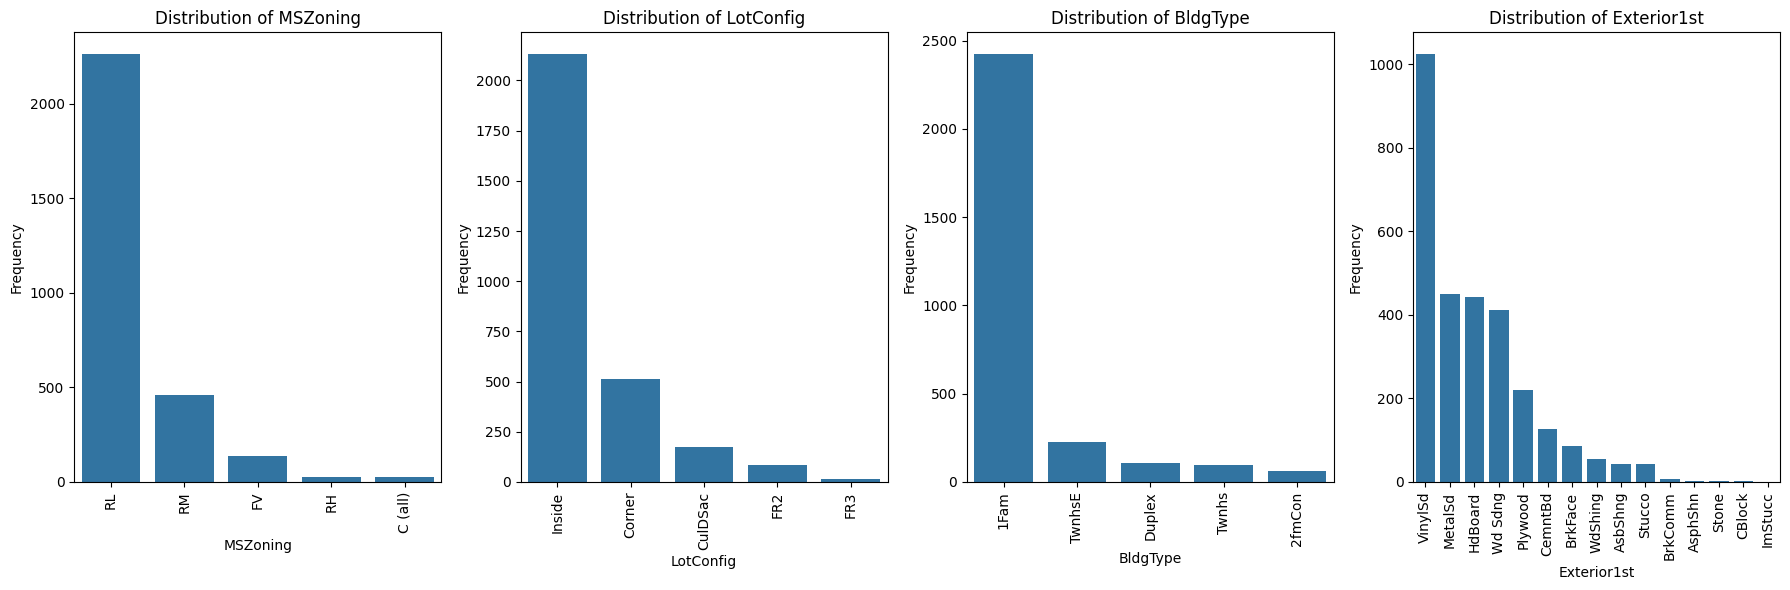

In [9]:
# Categorical features distribution
import math
ncols = 4
num_categories = len(object_cols)
nrows = math.ceil(num_categories / ncols) # Calculate the number of rows using the ceiling value.

plt.figure(figsize=(18, 6*nrows))  # Dynamic Height, 6 inches per row

index = 1
for col in object_cols:
    y = house_data[col].value_counts()
    plt.subplot(nrows, ncols, index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

plt.tight_layout()
plt.show()

<ipython-input-10-2168342dd3e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MSZoning', y='SalePrice', data=house_data, palette='viridis')


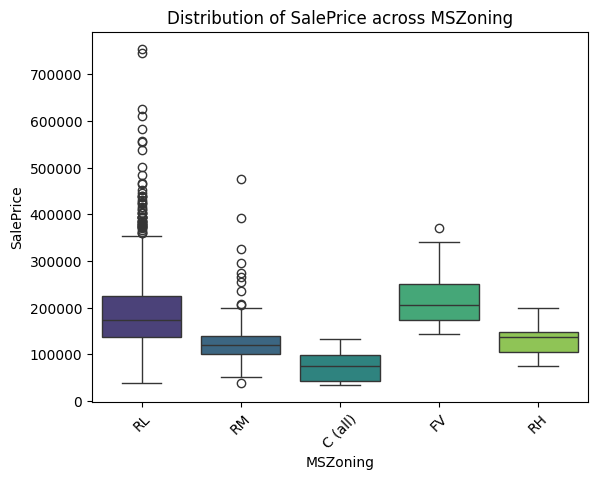

In [10]:
# Boxplot for SalePrice across different MSZoning categories
sns.boxplot(x='MSZoning', y='SalePrice', data=house_data, palette='viridis')
plt.title('Distribution of SalePrice across MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)  # Rotate labels for better readability (if needed)
plt.show()

**The graph suggests that one of the factors influencing house sale prices is zoning classification. Compared to other zoning categories, homes in the "RM" category typically have higher sale prices and greater price variety.**

<ipython-input-12-dbc9a612d228>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BldgType', y='SalePrice', data=house_data,palette='viridis')


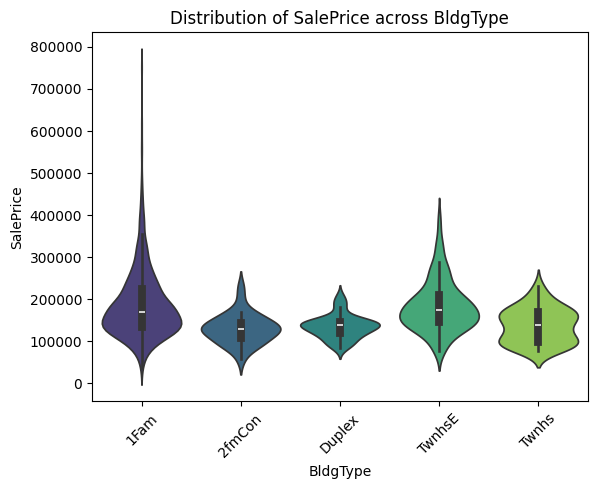

In [12]:
# Violin plot for SalePrice across BldgType
sns.violinplot(x='BldgType', y='SalePrice', data=house_data,palette='viridis')
plt.title('Distribution of SalePrice across BldgType')
plt.xlabel('BldgType')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

**According to the graph, the form of building has an impact on the price at which houses are sold. Compared to other building types, homes of the "1Fam" building type typically have higher sale prices and greater price variety.**

## **Data Cleaning**

In [13]:
# Finding Missing Values in each feature
missing_values = house_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


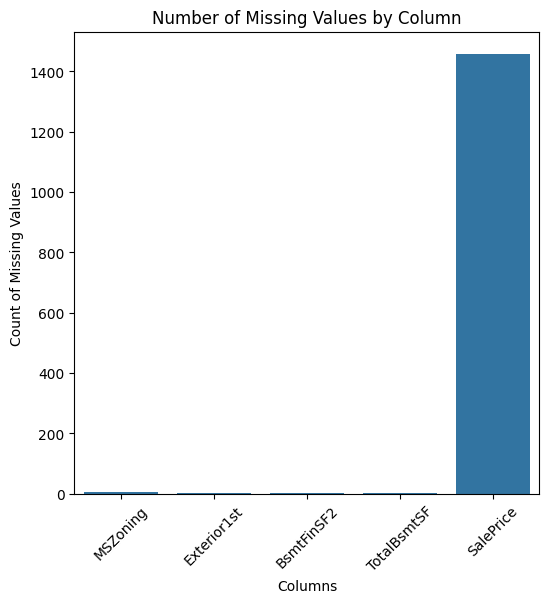

In [14]:
missing_values = house_data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter columns with missing values

plt.figure(figsize=(6, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Number of Missing Values by Column')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

In [15]:
# As Id column is not that important and is not useful for prediction, we will drop it.
house_data.drop(['Id'],
             axis=1,
             inplace=True)

In [16]:
# Filling Sales price missing values with the mean of the feature
house_data['SalePrice'] = house_data['SalePrice'].fillna(house_data['SalePrice'].mean())

In [17]:
# As the number of missing values in MSZoning, Exterior1st, BsmntFinSF2, TotalBsmtSF is small
# We can drop those rows
new_data = house_data.dropna(subset=['MSZoning', 'Exterior1st', 'BsmtFinSF2', 'TotalBsmtSF'])

In [18]:
# Verifying whether any features in the new dataset still have null values.
new_data.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


In [19]:
# One hot encoder for categorical values
from sklearn.preprocessing import OneHotEncoder

cat_var = (new_data.dtypes == 'object')
object_cols = list(cat_var[cat_var].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [20]:
hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
oh_cols = pd.DataFrame(hot_encoder.fit_transform(new_data[object_cols]))
oh_cols.index = new_data.index
oh_cols.columns = hot_encoder.get_feature_names_out()
data_final = new_data.drop(object_cols, axis=1)
data_final = pd.concat([data_final, oh_cols], axis=1)

## **Splitting Dataset into Training and Testing**

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = data_final.drop(['SalePrice'], axis=1) # except Sales price(Target variable)
Y = data_final['SalePrice']

# Split the training set into
# training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


## **Building Model**

## **SVM – Support vector Machine**

In [22]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error,r2_score

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
svm_pred = model_SVR.predict(X_test)

print("MAPE:",mean_absolute_percentage_error(Y_test, svm_pred))
print("R2_score:",r2_score(Y_test, svm_pred))


MAPE: 0.1870512931870423
R2_score: 1.6224524168606536e-06


## **Random Forest Regression**

In [33]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
rfr_pred = model_RFR.predict(X_test)

print("MAPE:",mean_absolute_percentage_error(Y_test, rfr_pred))
print("R2_score:",r2_score(Y_test, rfr_pred))

MAPE: 0.19030257085152052
R2_score: 0.27082315473474794


## **Linear Regression**

In [24]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
lr_pred = model_LR.predict(X_test)

print("MAPE:",mean_absolute_percentage_error(Y_test, lr_pred))
print("R2_score:",r2_score(Y_test, lr_pred))


MAPE: 0.1874168384159986
R2_score: 0.3741422704574465


## **CatBoost Classifier**

In [26]:
!pip install catboost # install the catboost package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [27]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

model_CB = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=6, verbose=0)
model_CB.fit(X_train, Y_train)
cb_pred = model_CB.predict(X_test)
print("MAPE:", mean_absolute_percentage_error(Y_test, cb_pred))
print("R2 Score:", r2_score(Y_test, cb_pred))

MAPE: 0.183260972308695
R2 Score: 0.38924340626940057


## **XGBoost Regressor**

In [28]:
from xgboost import XGBRegressor
model_XGB = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
model_XGB.fit(X_train, Y_train)
xgb_pred = model_XGB.predict(X_test)
print("MAPE:", mean_absolute_percentage_error(Y_test, xgb_pred))
print("R2 Score:", r2_score(Y_test, xgb_pred))


MAPE: 0.18612585048604968
R2 Score: 0.3146372781549295


In [34]:
# Define model performance data
data_model = {
    "Model": ["SVM", "Random Forest", "Linear Regression", "CatBoost", "XGBoost"],
    "MAPE": [0.1870, 0.1903, 0.1874, 0.1833, 0.1861],
    "R² Score": [1.622e-6, 0.2708, 0.3741, 0.3892, 0.3146]
}

performance_table = pd.DataFrame(data_model)

print(performance_table)


               Model    MAPE  R² Score
0                SVM  0.1870  0.000002
1      Random Forest  0.1903  0.270800
2  Linear Regression  0.1874  0.374100
3           CatBoost  0.1833  0.389200
4            XGBoost  0.1861  0.314600


**As seen from the results CatBoost outperforms other models.**
**In terms of both MAPE and R2 score, CatBoost is the best-performing model. It is best suited for the dataset since it strikes a balance between explanatory power. and forecast accuracy.**

## **Visualisation of Results**

### **Comparison of Actual and Predicted Sale Prices with Error Analysis**


SVM:
            Actual      Predicted         Error
1728  180921.19589  180921.098507      0.097383
2689  180921.19589  180921.357388      0.161497
1151  149900.00000  180921.295405  31021.295405
2762  180921.19589  180921.200483      0.004593
1180  250000.00000  180921.196444  69078.803556
2223  180921.19589  180921.149051      0.046839
553   108000.00000  180920.978008  72920.978008
104   169500.00000  180921.106705  11421.106705
1190  168000.00000  180921.351518  12921.351518
2308  180921.19589  180921.205654      0.009764


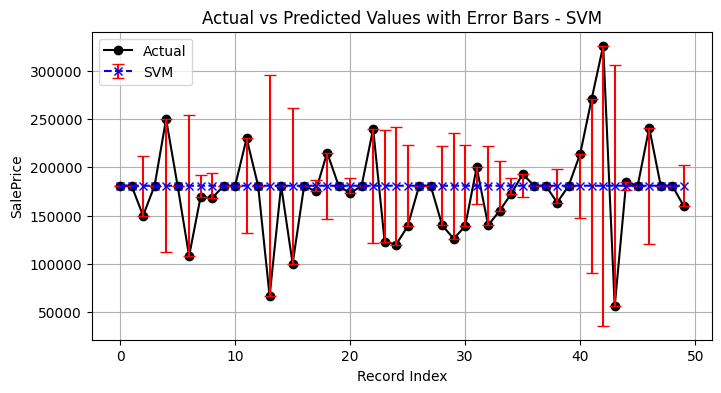


Random Forest:
            Actual      Predicted          Error
1728  180921.19589  188352.717534    7431.521644
2689  180921.19589  354261.639178  173340.443288
1151  149900.00000  166710.597945   16810.597945
2762  180921.19589  175844.837123    5076.358767
1180  250000.00000  205972.418562   44027.581438
2223  180921.19589  201010.597945   20089.402055
553   108000.00000  137124.239178   29124.239178
104   169500.00000  160144.837123    9355.162877
1190  168000.00000  195049.258767   27049.258767
2308  180921.19589  201444.837123   20523.641233


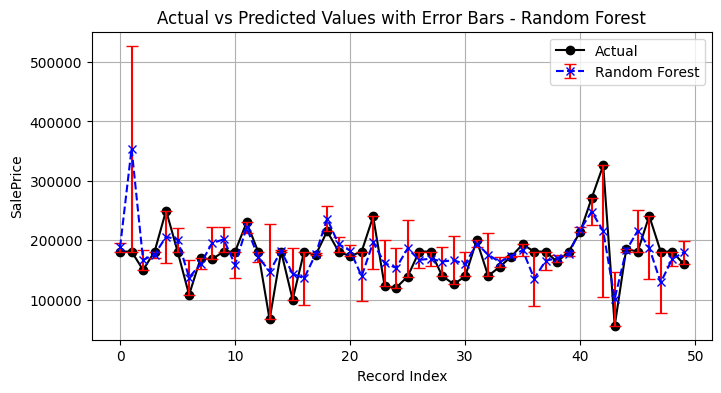


Linear Regression:
            Actual      Predicted         Error
1728  180921.19589  191650.159234  10728.963344
2689  180921.19589  256694.212040  75773.016150
1151  149900.00000  172701.860417  22801.860417
2762  180921.19589  178271.406358   2649.789533
1180  250000.00000  206419.736135  43580.263865
2223  180921.19589  197732.891018  16811.695128
553   108000.00000  122841.483758  14841.483758
104   169500.00000  157878.589347  11621.410653
1190  168000.00000  191291.778879  23291.778879
2308  180921.19589  204804.033084  23882.837193


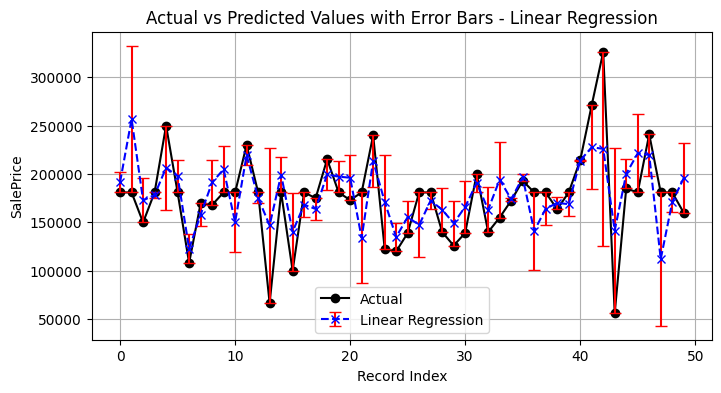


CatBoost:
            Actual      Predicted          Error
1728  180921.19589  178497.044971    2424.150920
2689  180921.19589  361843.912798  180922.716907
1151  149900.00000  164398.122464   14498.122464
2762  180921.19589  170596.654188   10324.541703
1180  250000.00000  215775.638796   34224.361204
2223  180921.19589  199940.580507   19019.384616
553   108000.00000  133590.630283   25590.630283
104   169500.00000  153089.600915   16410.399085
1190  168000.00000  164574.153506    3425.846494
2308  180921.19589  216650.709653   35729.513762


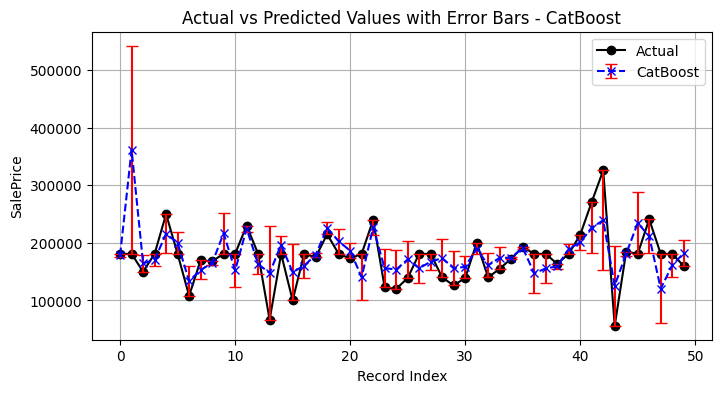


XGBoost:
            Actual      Predicted          Error
1728  180921.19589  183132.843750    2211.647860
2689  180921.19589  351586.687500  170665.491610
1151  149900.00000  173813.031250   23913.031250
2762  180921.19589  169000.296875   11920.899015
1180  250000.00000  227029.328125   22970.671875
2223  180921.19589  198481.500000   17560.304110
553   108000.00000  131928.062500   23928.062500
104   169500.00000  154070.562500   15429.437500
1190  168000.00000  172489.359375    4489.359375
2308  180921.19589  214647.125000   33725.929110


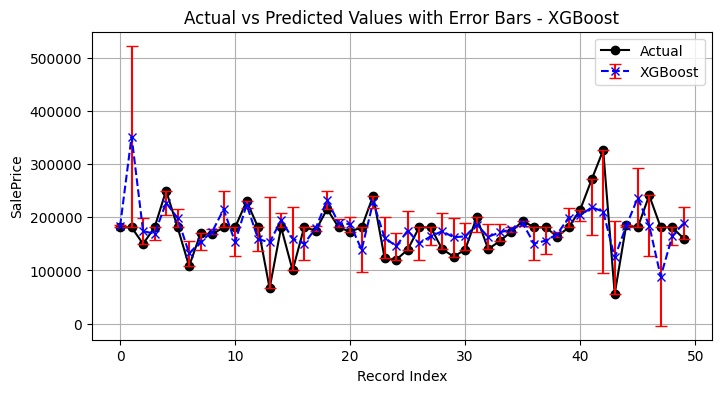

In [38]:
import numpy as np

predictions = {
    "SVM": svm_pred,
    "Random Forest": rfr_pred,
    "Linear Regression": lr_pred,
    "CatBoost": cb_pred,
    "XGBoost": xgb_pred
}

subset = np.arange(0, 50)  # Choosing the first 50 records for visualization
actual_values = Y_test.iloc[subset]

for model, y_pred in predictions.items():
    # Calculating the error (absolute difference between actual and predicted values)
    errors = np.abs(actual_values - y_pred[subset])

    # Printing first 10 actual and predicted values
    print(f"\n{model}:")
    comparison = pd.DataFrame({
        "Actual": actual_values.values[:10],
        "Predicted": y_pred[subset][:10],
        "Error": errors[:10]
    })
    print(comparison)

    # Plotting actual vs predicted with error bars
    plt.figure(figsize=(8, 4))
    plt.plot(subset, actual_values, label="Actual", color="black", marker="o")
    plt.errorbar(subset, y_pred[subset], yerr=errors, fmt='x',
                 linestyle="--", color="blue", label=model, ecolor="red", capsize=4)

    plt.title(f"Actual vs Predicted Values with Error Bars - {model}")
    plt.xlabel("Record Index")
    plt.ylabel("SalePrice")
    plt.legend()
    plt.grid(True)
    plt.show()


## **Some primary findings can be drawn from a visual review of the line plots with error bars across various models:**
# **CatBoost:** With improved accuracy and less prediction uncertainty, CatBoost exhibits the highest overall performance.
# **XGBoost:** Although the XGBoost model also exhibits a strong match, it makes predictions that are a little more dispersed than those of CatBoost and have a larger level of uncertainty.
# **Random Forest Regressor:** Does well too, but has a little more uncertainty than XGBoost and CatBoost.
#**Linear Regressor:** Compared to CatBoost and Random Forest, Linear Regression has a satisfactory fit but has greater uncertainty and greater deviation from actual values.
# **SVM:** Compared to the other four models, SVM exhibits higher uncertainty and more predicted variability.
